[Code source](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles
from sklearn.metrics import (make_scorer, accuracy_score,
                             precision_score, recall_score,
                             f1_score, fbeta_score,
                             confusion_matrix, ConfusionMatrixDisplay)

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

## Prepare data

In [2]:
X, y = make_circles(noise=0.3, factor=0.5, random_state=1)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [4]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

## SVC Classifier

In [8]:
score = make_scorer(accuracy_score)

In [9]:
parameters = {'svc__C': range(0,20), 'svc__gamma': range(1,20)}

In [10]:
clf = make_pipeline(StandardScaler(), SVC(random_state=42))

In [11]:
clf

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=42))])

In [12]:
gscv = GridSearchCV(clf, parameters, cv=5, scoring=score, return_train_score=True, refit=True) # explain refit

In [13]:
gscv

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC(random_state=42))]),
             param_grid={'svc__C': range(0, 20), 'svc__gamma': range(1, 20)},
             return_train_score=True, scoring=make_scorer(accuracy_score))

In [14]:
gscv.fit(X_train, y_train)
best_clf = gscv.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
95 fits failed out of a total of 1900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
95 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sk

Anatomy of a matplotlib graph and introduction to object oriented interface [here](https://matplotlib.org/matplotblog/posts/pyplot-vs-object-oriented-interface/)

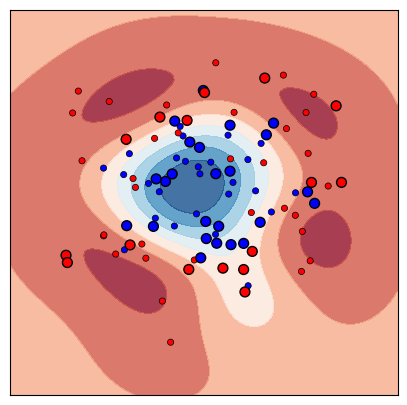

In [19]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])

fig, ax = plt.subplots()
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

ax.set_xticks(())
ax.set_yticks(())

# ax.set_ylabel('X2')
# ax.set_xlabel('X1')

display = DecisionBoundaryDisplay.from_estimator(best_clf, X, cmap=cm, ax=ax, alpha=0.8, eps=0.5)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, cmap=cm_bright,  edgecolors="k", linewidths=0.5)
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50.0, cmap=cm_bright, edgecolors="k", linewidths=1.0)
fig.set_size_inches(5,5)
fig.set_dpi(100)

plt.show()

In [20]:
yhat_train = best_clf.predict(X_train)
confusion_matrix(y_train, yhat_train)

array([[28,  6],
       [ 8, 18]])

In [ ]:
accuracy_score(y_train, yhat_train), precision_score(y_train, yhat_train), recall_score(y_train, yhat_train), f1_score(y_train, yhat_train)

(0.7666666666666667, 0.75, 0.6923076923076923, 0.7199999999999999)

In [ ]:
yhat_test = best_clf.predict(X_test)
confusion_matrix(y_test, yhat_test)

array([[16,  0],
       [11, 13]])

In [ ]:
accuracy_score(y_test, yhat_test), precision_score(y_test, yhat_test), recall_score(y_test, yhat_test), f1_score(y_test, yhat_test)

(0.725, 1.0, 0.5416666666666666, 0.7027027027027027)